## Set up

In [4]:
library("magrittr")
library("sscVis")
library("data.table")
library("R.utils")
library("ggpubr")
library("ggplot2")
library("plyr")
library("grid")
library(dplyr)
library(zellkonverter)
source("./func.R")
RhpcBLASctl::omp_set_num_threads(1)
doParallel::registerDoParallel(cores = 12)

## Read data

In [5]:
SC76 = readH5AD("3_annotated.h5ad")

## Find cell_type

In [9]:
colData(SC76) %>%
as.matrix()%>%
head()

,batch,sample_batch,initial_size_spliced,initial_size_unspliced,initial_size,n_counts,log_counts,n_genes,mt_frac,doublet_score,doublet,size_factors,louvain_r1.5,louvain_r0.5,louvain1,louvain_05,cell_type,group
AAACCCACATGGAATA,1,1,6147,3549,6147,8803,9.083075,2680,0.06984667,0.009331260,0,1.5264010,20,5,4,5,6,1
AAACCCAGTAACACCT,1,1,1526,559,1526,2272,7.728416,1168,0.06514084,0.013107417,0,0.4064996,4,5,4,5,6,1
AAACCCATCTGCTGAA,1,1,2992,924,2992,3983,8.290293,984,0.11066499,0.003727550,0,0.3467420,9,1,12,1,5,1
AAACGAAGTATGCGGA,1,1,1092,42,1092,1522,7.327781,725,0.10775296,0.007203962,0,0.2257040,3,7,5,7,6,1
AAACGCTAGAAAGCGA,1,1,652,53,652,1163,7.059618,447,0.24484536,0.016356877,0,0.1301607,2,2,3,2,4,1
AAACGCTAGCGACCCT,1,1,838,252,838,1035,6.943122,517,0.05405406,0.003995830,0,0.1091481,5,6,10,6,5,1


## Find umap name

In [10]:
reducedDimNames(SC76)

[1] "X_diffmap"       "X_draw_graph_fr" "X_pca"           "X_pca_harmony"  
[5] "X_tsne"          "X_umap"

## Plot

In [12]:
multi = ssc.plot.tsne(SC76,columns = "cell_type",reduced.name = "X_umap",
                          vector.friendly=T,legend.w=1.2,
                          theme.use=theme_pubr,verbose=T,
                          size=1.0,
                          label = 2,
                          par.repel = list(force = 1,bg.color="white",bg.r=0.15),
                          par.geom_point=list(scale=0.6),
                          par.geneOnTSNE = list(pt.order = "random")) #can also list colors: colSet=c('')

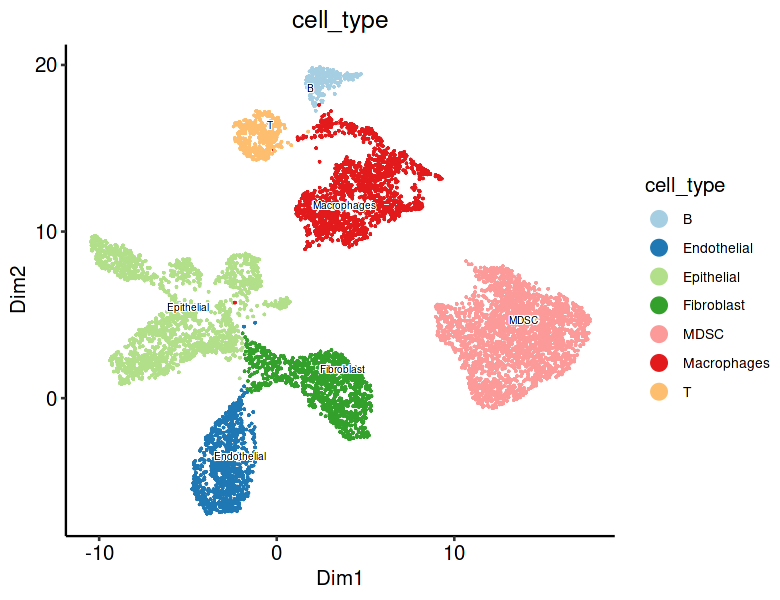

In [13]:
options(repr.plot.width=6.5, repr.plot.height=5)
multi$list[[1]] + theme(legend.position="right")

## Save pdf, adjust in AI

In [ ]:
ggsave("figure1/umap.pdf",width=6.5,height=4.25,useDingbats=FALSE)